In [1]:
from IVClassification import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ref_coef = np.zeros(100)
lg_coef = np.zeros(100)
tslg_coef = np.zeros(100)
thslg_coef = np.zeros(100)
gmm_coef = np.zeros(100)
res_coef = np.zeros(100)

## Beta

In [5]:

# Investigating beta

para_range = np.linspace(0, 10, 100)

for i in range(100):
    beta = para_range[i]
    
    data = sim_data(10000, beta = beta, sigma_e=0.1)
    
    ref_lg = LogisticRegression()
    complete_data = np.concatenate((data.X.reshape(-1, 1), data.U.reshape(-1, 1)), axis=1)
    ref_lg.fit(complete_data, data.Y)
    ref_coef[i] = ref_lg.coef_[0][0]
    
    lg = LogisticRegression()
    lg.fit(data.X.reshape(-1, 1), data.Y)
    lg_coef[i] = lg.coef_[0][0]
    
    tslg = two_stage_logit()
    tslg.fit(X = data.X, Y = data.Y, Z = data.Z)
    tslg_coef[i] = tslg.coef_
    
    thslg = three_stage_logit()
    thslg.fit(X = data.X, Y = data.Y, Z = data.Z)
    thslg_coef[i] = thslg.coef_
    
    gmm = GMM_logit()
    gmm.fit(X = data.X, Y = data.Y, Z = data.Z)
    gmm_coef[i] = gmm.coef_
    
    res_model = residual_logit()
    res_model.fit(X = data.X, Y = data.Y, Z = data.Z)
    res_coef[i] = res_model.beta
    



Text(0, 0.5, 'Estimated beta')

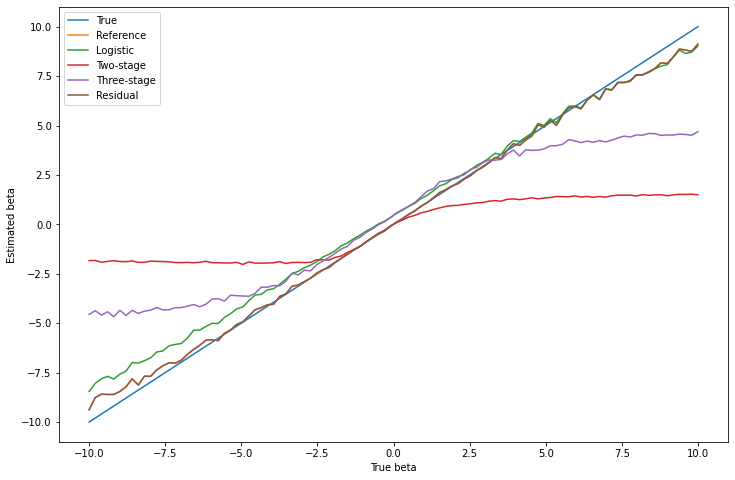

In [5]:
plt.figure(figsize=(12, 8))
plt.plot(para_range, para_range, label = 'True')
plt.plot(para_range, ref_coef, label = 'Reference')
plt.plot(para_range, lg_coef, label = 'Logistic')
plt.plot(para_range, tslg_coef, label = 'Two-stage')
plt.plot(para_range, thslg_coef, label = 'Three-stage')
#plt.plot(para_range, gmm_coef, label = 'GMM')
plt.plot(para_range, res_coef, label = 'Residual')
plt.legend()
plt.xlabel('True beta')
plt.ylabel('Estimated beta')

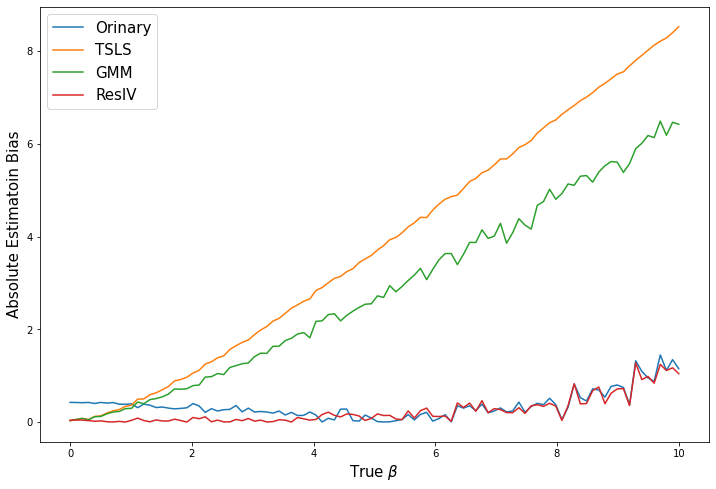

In [15]:
ref_dif = np.abs(para_range - ref_coef)
lg_dif = np.abs(para_range - lg_coef)
tslg_dif = np.abs(para_range - tslg_coef)
thslg_dif = np.abs(para_range - thslg_coef)
gmm_dif = np.abs(para_range - gmm_coef)
res_dif = np.abs(para_range - res_coef)

plt.figure(figsize=(12, 8))
# plt.plot(para_range, ref_dif, label = 'Reference')
plt.plot(para_range, lg_dif, label = 'Orinary')
plt.plot(para_range, tslg_dif, label = 'TSLS')
# plt.plot(para_range, thslg_dif, label = 'Three-stage')
plt.plot(para_range, gmm_dif, label = 'GMM')
plt.plot(para_range, res_dif, label = 'ResIV')
plt.legend(fontsize=15)
plt.xlabel(r'True $\beta$', fontsize=15)
plt.ylabel('Absolute Estimatoin Bias', fontsize=15)
plt.show()

## Eta

In [22]:
para_range = np.linspace(-10, 10, 100)
beta = 1

for i in range(100):
    eta = para_range[i]
    
    data = sim_data(n=10000, eta = eta, beta = 1)
    
    ref_lg = LogisticRegression()
    complete_data = np.concatenate((data.X.reshape(-1, 1), data.U.reshape(-1, 1)), axis=1)
    ref_lg.fit(complete_data, data.Y)
    ref_coef[i] = ref_lg.coef_[0][0]
    
    lg = LogisticRegression()
    lg.fit(data.X.reshape(-1, 1), data.Y)
    lg_coef[i] = lg.coef_[0][0]
    
    tslg = two_stage_logit()
    tslg.fit(X = data.X, Y = data.Y, Z = data.Z)
    tslg_coef[i] = tslg.coef_
    
    # thslg = three_stage_logit()
    # thslg.fit(X = data.X, Y = data.Y, Z = data.Z)
    # thslg_coef[i] = thslg.coef_
    
    gmm = GMM_logit()
    gmm.fit(X = data.X, Y = data.Y, Z = data.Z)
    gmm_coef[i] = gmm.coef_
    
    res_model = residual_logit()
    res_model.fit(X = data.X, Y = data.Y, Z = data.Z)
    res_coef[i] = res_model.beta
    

Text(0, 0.5, 'Estimated beta')

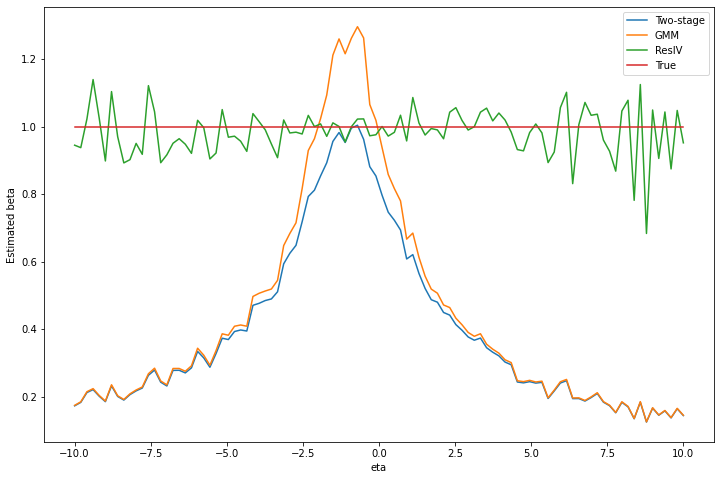

In [24]:
plt.figure(figsize=(12, 8))

# plt.plot(para_range, ref_coef, label = 'Reference')
# plt.plot(para_range, lg_coef, label = 'Ordinary')
plt.plot(para_range, tslg_coef, label = 'Two-stage')
# plt.plot(para_range, thslg_coef, label = 'Three-stage')
plt.plot(para_range, gmm_coef, label = 'GMM')
plt.plot(para_range, res_coef, label = 'ResIV')
plt.plot(para_range, np.ones(100), label = 'True')
plt.legend(fontsize=15)
plt.xlabel(r'$\eta$', fontsize=15)
plt.ylabel(r'Estimated \beta', fontsize=15)

## Gamma

In [10]:
para_range = np.linspace(-10, 10, 100)
beta = 1

for i in range(100):
    gamma = para_range[i]
    
    data = sim_data(n=10000, gamma = gamma, beta = 1)
    
    ref_lg = LogisticRegression()
    complete_data = np.concatenate((data.X.reshape(-1, 1), data.U.reshape(-1, 1)), axis=1)
    ref_lg.fit(complete_data, data.Y)
    ref_coef[i] = ref_lg.coef_[0][0]
    
    lg = LogisticRegression()
    lg.fit(data.X.reshape(-1, 1), data.Y)
    lg_coef[i] = lg.coef_[0][0]
    
    tslg = two_stage_logit()
    tslg.fit(X = data.X, Y = data.Y, Z = data.Z)
    tslg_coef[i] = tslg.coef_
    
    thslg = three_stage_logit()
    thslg.fit(X = data.X, Y = data.Y, Z = data.Z)
    thslg_coef[i] = thslg.coef_
    
    gmm = GMM_logit()
    gmm.fit(X = data.X, Y = data.Y, Z = data.Z)
    gmm_coef[i] = gmm.coef_
    
    res_model = residual_logit()
    res_model.fit(X = data.X, Y = data.Y, Z = data.Z)
    res_coef[i] = res_model.beta

Text(0, 0.5, 'Estimated beta')

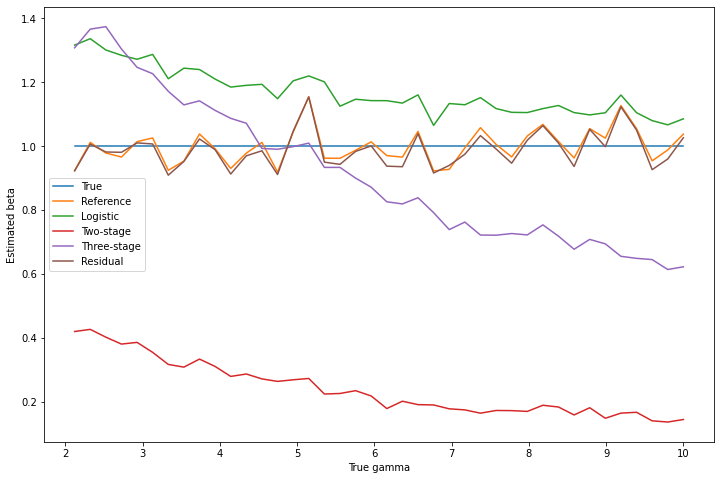

In [11]:
positive_range = para_range[para_range > 2]
plt.figure(figsize=(12, 8))
plt.plot(positive_range, beta * np.ones(len(positive_range)), label = 'True')
plt.plot(positive_range, ref_coef[para_range > 2], label = 'Reference')
plt.plot(positive_range, lg_coef[para_range > 2], label = 'Logistic')
plt.plot(positive_range, tslg_coef[para_range > 2], label = 'Two-stage')
plt.plot(positive_range, thslg_coef[para_range > 2], label = 'Three-stage')
#plt.plot(positive_range, gmm_coef[para_range > 2], label = 'GMM')
plt.plot(positive_range, res_coef[para_range > 2], label = 'Residual')
plt.legend()
plt.xlabel('True gamma')
plt.ylabel('Estimated beta')

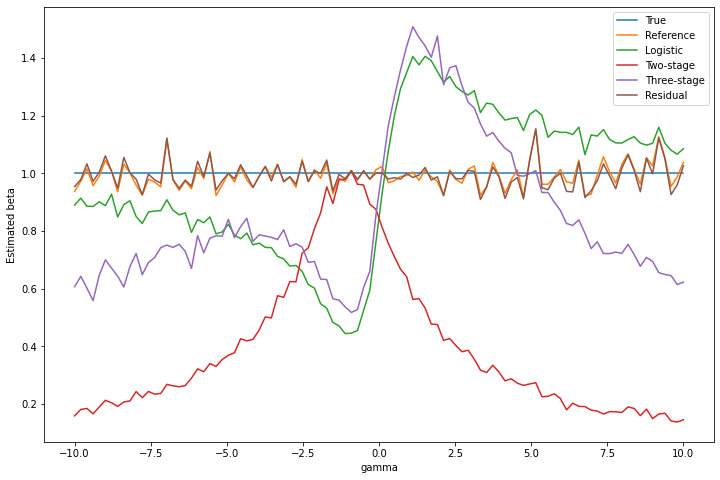

In [12]:
plt.figure(figsize=(12, 8))
plt.plot(para_range, beta * np.ones(100), label = 'True')
plt.plot(para_range, ref_coef, label = 'Reference')
plt.plot(para_range, lg_coef, label = 'Logistic')
plt.plot(para_range, tslg_coef, label = 'Two-stage')
plt.plot(para_range, thslg_coef, label = 'Three-stage')
#plt.plot(para_range, gmm_coef, label = 'GMM')
plt.plot(para_range, res_coef, label = 'Residual')
plt.legend()
plt.xlabel('gamma')
plt.ylabel('Estimated beta')
plt.show()

## Alpha

In [13]:
para_range = np.linspace(-10, 10, 100)
beta = 1

for i in range(100):
    alpha = para_range[i]
    
    data = sim_data(n=10000, alpha = alpha, beta = beta)
    
    ref_lg = LogisticRegression()
    complete_data = np.concatenate((data.X.reshape(-1, 1), data.U.reshape(-1, 1)), axis=1)
    ref_lg.fit(complete_data, data.Y)
    ref_coef[i] = ref_lg.coef_[0][0]    
    
    lg = LogisticRegression()
    lg.fit(data.X.reshape(-1, 1), data.Y)
    lg_coef[i] = lg.coef_[0][0]
    
    tslg = two_stage_logit()
    tslg.fit(X = data.X, Y = data.Y, Z = data.Z)
    tslg_coef[i] = tslg.coef_
    
    thslg = three_stage_logit()
    thslg.fit(X = data.X, Y = data.Y, Z = data.Z)
    thslg_coef[i] = thslg.coef_
    
    gmm = GMM_logit()
    gmm.fit(X = data.X, Y = data.Y, Z = data.Z)
    gmm_coef[i] = gmm.coef_
    
    res_model = residual_logit()
    res_model.fit(X = data.X, Y = data.Y, Z = data.Z)
    res_coef[i] = res_model.beta
    

Text(0, 0.5, 'Estimated beta')

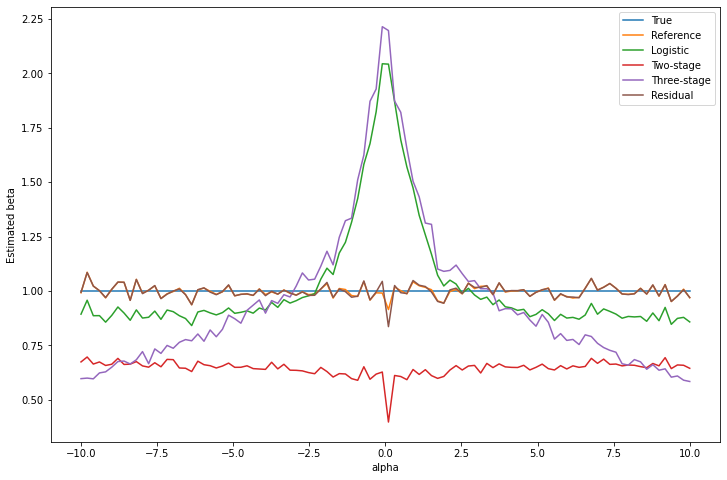

In [14]:
plt.figure(figsize=(12, 8))
plt.plot(para_range, beta * np.ones(100), label = 'True')
plt.plot(para_range, ref_coef, label = 'Reference')
plt.plot(para_range, lg_coef, label = 'Logistic')
plt.plot(para_range, tslg_coef, label = 'Two-stage')
plt.plot(para_range, thslg_coef, label = 'Three-stage')
#plt.plot(para_range, gmm_coef, label = 'GMM')
plt.plot(para_range, res_coef, label = 'Residual')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('Estimated beta')

# Sensitivity to epsilon

In [19]:
k = np.linspace(-1, 4, 100)
para_range = np.power(10, k)
beta=1

for i in range(100):
    sigma_e = para_range[i]
    
    data = sim_data(n=10000, sigma_e = sigma_e, beta = beta)
    
    ref_lg = LogisticRegression()
    
    complete_data = np.concatenate((data.X.reshape(-1, 1), data.U.reshape(-1, 1)), axis=1)
    ref_lg.fit(complete_data, data.Y)
    ref_coef[i] = ref_lg.coef_[0][0]
    
    lg = LogisticRegression()
    lg.fit(data.X.reshape(-1, 1), data.Y)
    lg_coef[i] = lg.coef_[0][0]
    
    tslg = two_stage_logit()
    tslg.fit(X = data.X, Y = data.Y, Z = data.Z)
    tslg_coef[i] = tslg.coef_
    
    thslg = three_stage_logit()
    thslg.fit(X = data.X, Y = data.Y, Z = data.Z)
    thslg_coef[i] = thslg.coef_
    
    gmm = GMM_logit()
    gmm.fit(X = data.X, Y = data.Y, Z = data.Z)
    gmm_coef[i] = gmm.coef_
    
    res_model = residual_logit()
    res_model.fit(X = data.X, Y = data.Y, Z = data.Z)
    res_coef[i] = res_model.beta
    

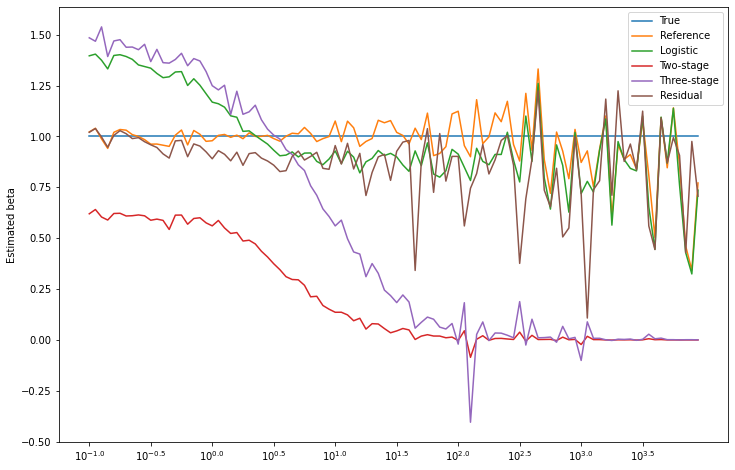

In [20]:
plt.figure(figsize=(12, 8))
plt.plot(k, beta * np.ones(100), label = 'True')
plt.plot(k, ref_coef, label = 'Reference')
plt.plot(k, lg_coef, label = 'Logistic')
plt.plot(k, tslg_coef, label = 'Two-stage')
plt.plot(k, thslg_coef, label = 'Three-stage')
#plt.plot(k, gmm_coef, label = 'GMM')
plt.plot(k, res_coef, label = 'Residual')
plt.xticks(k[::10], [f'$10^{{{round(ki, 1)}}}$' for ki in k[::10]])
plt.legend()
plt.ylabel('Estimated beta')
plt.show()